In [4]:
from nltk import word_tokenize, pos_tag
from nltk.tokenize import word_tokenize

import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud, STOPWORDS 

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
import pickle

from PIL import Image
import re

import scipy.sparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import plotly.graph_objects as go
import warnings

from bokeh.plotting import figure
import squarify
import plotly.io as pio

from wordcloud import WordCloud


pio.templates.default ='ggplot2'

warnings.filterwarnings("ignore")



In [5]:
data = pd.read_csv(r"C:\Users\sandr\OneDrive\Documents\A DATA\tajmahal.csv")
data

star                 date  \
0     5.0             Dec 2021   
1     5.0             Jan 2022   
2     4.0             Dec 2021   
3     5.0  Feb 2022 • Business   
4     5.0   Jan 2022 • Couples   
..    ...                  ...   
122   5.0             Oct 2020   
123   5.0             Oct 2020   
124   5.0             Nov 2019   
125   5.0   Dec 2019 • Friends   
126   5.0    Oct 2020 • Family   

                                                 quote  \
0    Taj Mahal Is Taj Mahal, Such a beautiful Monument   
1                                      Excellent place   
2                                 Great Memorable Pics   
3          Extraordinary and very impressive Monument    
4                        Most well maintained monument   
..                                                 ...   
122                                    Excellent place   
123  Stunning , surreal and empty in the times of C...   
124             Taj Mahal - A beautiful symbol of love   
125                                   Stunning setting   
126                           Taj *the real aesthetic*   

                                               message  
0    Of course Taj mahal is a must visit. great Mug...  
1    I have visited this place in the last month wi...  
2    It was an amazing visit in the winters, please...  
3    Finally visited one of those magnificent build...  
4    It's well maintained and clean monument and ha...  
..                                                 ...  
122  Due to covid we had the place almost to oursel...  
123  As many reviewers have said , the last 100 met...  
124  Taj Mahal is one of the 7 wonders of the world...  
125  It was an amazing place. A very popular place....  
126  Taj is one of the most amazing monument. I saw...  

[127 rows x 4 columns]

In [6]:
data.dtypes

star       float64
date        object
quote       object
message     object
dtype: object

In [7]:
data.isnull().sum()

star       0
date       0
quote      0
message    0
dtype: int64

In [8]:
#CLEAN DATE COLUMN
data['date']=data['date'].replace(to_replace=r'•[^|]*$', value='', regex=True)
data

star       date                                              quote  \
0     5.0   Dec 2021  Taj Mahal Is Taj Mahal, Such a beautiful Monument   
1     5.0   Jan 2022                                    Excellent place   
2     4.0   Dec 2021                               Great Memorable Pics   
3     5.0  Feb 2022         Extraordinary and very impressive Monument    
4     5.0  Jan 2022                       Most well maintained monument   
..    ...        ...                                                ...   
122   5.0   Oct 2020                                    Excellent place   
123   5.0   Oct 2020  Stunning , surreal and empty in the times of C...   
124   5.0   Nov 2019             Taj Mahal - A beautiful symbol of love   
125   5.0  Dec 2019                                    Stunning setting   
126   5.0  Oct 2020                            Taj *the real aesthetic*   

                                               message  
0    Of course Taj mahal is a must visit. great Mug...  
1    I have visited this place in the last month wi...  
2    It was an amazing visit in the winters, please...  
3    Finally visited one of those magnificent build...  
4    It's well maintained and clean monument and ha...  
..                                                 ...  
122  Due to covid we had the place almost to oursel...  
123  As many reviewers have said , the last 100 met...  
124  Taj Mahal is one of the 7 wonders of the world...  
125  It was an amazing place. A very popular place....  
126  Taj is one of the most amazing monument. I saw...  

[127 rows x 4 columns]

In [9]:
data.message

0      Of course Taj mahal is a must visit. great Mug...
1      I have visited this place in the last month wi...
2      It was an amazing visit in the winters, please...
3      Finally visited one of those magnificent build...
4      It's well maintained and clean monument and ha...
                             ...                        
122    Due to covid we had the place almost to oursel...
123    As many reviewers have said , the last 100 met...
124    Taj Mahal is one of the 7 wonders of the world...
125    It was an amazing place. A very popular place....
126    Taj is one of the most amazing monument. I saw...
Name: message, Length: 127, dtype: object

In [10]:
data.star.value_counts()

5.0    102
4.0     17
1.0      4
3.0      4
Name: star, dtype: int64

In [11]:
# Create a pieplot
#count_stars = data.groupby(data.star, as_index = False).agg({'Text' :'count'})
count_stars=data.groupby(["star"])["star"].count().reset_index(name="count")
names = ['1 star','3 star','4 star','5 star']
count_stars

fig = px.pie(count_stars, values='count', names=names,title='Percentage of Star')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)
fig.update_layout(title="TajMahal")
fig.show()

            

# JOIN ALL QUOTE AND CLEANING (lower case, punctuation, stopword)

In [12]:
# join all quote, in one text  
all_words4 = ' '.join(data.quote)
all_words4

"Taj Mahal Is Taj Mahal, Such a beautiful Monument Excellent place Great Memorable Pics Extraordinary and very impressive Monument  Most well maintained monument Tak Mahal! You beauty 😍 TAJ MAHAL! What is there to say? Wonderful  Thank you, @ramatoursdelhi!! Fabulous, a bucket list must do truly amazing. Feeling blessed Magnificent Taj Mahal Taj Mahal Most  most beautiful palace around in the world ... Nice and Soulful..  Wonderful just awesome Mesmerizing & Refreshing It's an architectural marvel Visit to The world’s 7th wonder!..... a MUST!! The White Wonder that's beyond words to appreciate Masterpiece Amazing place Mesmerizing Guides for Tajmahal Beautiful Great place with stupid rules! A Wonder Unique A must visit Exceptional Breath taking Taj a great wonder Extraordinary place One of wonders of world Taj Mahal Agra A guided live-streamed tour Visit Dont bye from surrounding shops The marble beauty Wah Taj! As always. The best of the seven wonders Marvellous! Surely a wonder! Must

In [13]:
# split into words
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
tokens = word_tokenize(all_words4)

# convert to lower case
tokens = [w.lower() for w in tokens]

# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]

# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]

# filter out stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['taj', 'mahal', 'taj', 'mahal', 'beautiful', 'monument', 'excellent', 'place', 'great', 'memorable', 'pics', 'extraordinary', 'impressive', 'monument', 'well', 'maintained', 'monument', 'tak', 'mahal', 'beauty', 'taj', 'mahal', 'say', 'wonderful', 'thank', 'ramatoursdelhi', 'fabulous', 'bucket', 'list', 'must', 'truly', 'amazing', 'feeling', 'blessed', 'magnificent', 'taj', 'mahal', 'taj', 'mahal', 'beautiful', 'palace', 'around', 'world', 'nice', 'soulful', 'wonderful', 'awesome', 'mesmerizing', 'refreshing', 'architectural', 'marvel', 'visit', 'world', 'wonder', 'must', 'white', 'wonder', 'beyond', 'words', 'appreciate', 'masterpiece', 'amazing', 'place', 'mesmerizing', 'guides', 'tajmahal', 'beautiful', 'great', 'place', 'stupid', 'rules', 'wonder', 'unique', 'must', 'visit', 'exceptional', 'breath', 'taking', 'taj', 'great', 'wonder', 'extraordinary', 'place', 'one', 'wonders', 'world', 'taj', 'mahal', 'agra', 'guided', 'livestreamed', 'tour', 'visit', 'dont', 'bye', 'surrounding'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
stop_words = set(stopwords.words('english'))


In [15]:
stopword=['place', 'monument', 'visit', 'most', 'must','taj', 'mahal']
wordcloud = WordCloud(stopwords=stopword, collocations=True, 
                        width = 800, height = 800,
                        background_color='white').generate(' '.join(words))
wordcloud

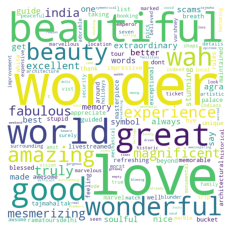

In [16]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [17]:
words
stopword=['place', 'monument', 'visit', 'most', 'must','taj', 'mahal', 'say']
for word in list(words):  # iterating on a copy since removing will mess things up
    if word in stopword:
        words.remove(word)

In [18]:
fdist = FreqDist(words)
fdist

FreqDist({'love': 13, 'wonder': 12, 'beautiful': 10, 'world': 7, 'great': 6, 'good': 6, 'wonderful': 5, 'wah': 5, 'beauty': 4, 'amazing': 4, ...})

In [19]:
words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
words_df= words_df.sort_values(by='count', ascending=False)
words_df

word  count
71           love     13
32         wonder     12
0       beautiful     10
24          world      7
2           great      6
..            ...    ...
53            bye      1
52           dont      1
51           tour      1
50   livestreamed      1
149     aesthetic      1

[150 rows x 2 columns]

In [20]:
d = words_df.nlargest(columns="count", n=20)
d = d.sort_values(by='count', ascending=False)
d['freq_rel'] = d['count']/(sum(d['count']))
d


word  count  freq_rel
71         love     13      0.13
32       wonder     12      0.12
0     beautiful     10      0.10
24        world      7      0.07
2         great      6      0.06
82         good      6      0.06
57          wah      5      0.05
11    wonderful      5      0.05
18      amazing      4      0.04
69   experience      4      0.04
10       beauty      4      0.04
63        india      3      0.03
28  mesmerizing      3      0.03
14     fabulous      3      0.03
17        truly      3      0.03
47      wonders      3      0.03
21  magnificent      3      0.03
46          one      2      0.02
35        words      2      0.02
70         made      2      0.02

In [21]:
fig = px.bar(
    x=d['freq_rel'],
    y=d.word,
    orientation='h')
fig.update_layout(title="Taj Mahal")
fig.show()


In [22]:
d['count'].mean()

5.0

# SENTIMENT ANALYSIS OF EACH MESSAGE (textblob)

In [23]:
from textblob import TextBlob
texts=data.message.tolist()
 
for i in texts:
    x=TextBlob(i).sentiment
    print(x)
    

Sentiment(polarity=0.65, subjectivity=0.675)
Sentiment(polarity=0.26, subjectivity=0.5333333333333333)
Sentiment(polarity=0.6000000000000001, subjectivity=0.7875)
Sentiment(polarity=0.4396358543417367, subjectivity=0.5502801120448179)
Sentiment(polarity=0.26666666666666666, subjectivity=0.5166666666666667)
Sentiment(polarity=0.6416666666666666, subjectivity=0.5208333333333334)
Sentiment(polarity=0.1, subjectivity=0.3570987654320988)
Sentiment(polarity=0.46666666666666673, subjectivity=0.6749999999999999)
Sentiment(polarity=0.33888888888888885, subjectivity=0.48333333333333334)
Sentiment(polarity=0.3054166666666667, subjectivity=0.52375)
Sentiment(polarity=0.28218787878787877, subjectivity=0.5381151515151515)
Sentiment(polarity=0.29444444444444445, subjectivity=0.4222222222222222)
Sentiment(polarity=0.705, subjectivity=0.74)
Sentiment(polarity=0.7166666666666668, subjectivity=0.75)
Sentiment(polarity=0.65, subjectivity=0.6166666666666667)
Sentiment(polarity=0.05334249084249084, subjecti

In [24]:
from textblob import TextBlob
texts=data.message.tolist()

def senti(x):
    return TextBlob(x).sentiment  

data['sentiment'] = data['message'].apply(senti)
data.head()

star       date                                              quote  \
0   5.0   Dec 2021  Taj Mahal Is Taj Mahal, Such a beautiful Monument   
1   5.0   Jan 2022                                    Excellent place   
2   4.0   Dec 2021                               Great Memorable Pics   
3   5.0  Feb 2022         Extraordinary and very impressive Monument    
4   5.0  Jan 2022                       Most well maintained monument   

                                             message  \
0  Of course Taj mahal is a must visit. great Mug...   
1  I have visited this place in the last month wi...   
2  It was an amazing visit in the winters, please...   
3  Finally visited one of those magnificent build...   
4  It's well maintained and clean monument and ha...   

                                   sentiment  
0                              (0.65, 0.675)  
1                 (0.26, 0.5333333333333333)  
2               (0.6000000000000001, 0.7875)  
3   (0.4396358543417367, 0.5502801120448179)  
4  (0.26666666666666666, 0.5166666666666667)

In [25]:
from textblob import TextBlob

def pola(x):
    return TextBlob(x).polarity  


def subj(x):
    return TextBlob(x).subjectivity  

data['polarity'] = data['message'].apply(pola)
data['subjectivity'] = data['message'].apply(subj)
data.head()

star       date                                              quote  \
0   5.0   Dec 2021  Taj Mahal Is Taj Mahal, Such a beautiful Monument   
1   5.0   Jan 2022                                    Excellent place   
2   4.0   Dec 2021                               Great Memorable Pics   
3   5.0  Feb 2022         Extraordinary and very impressive Monument    
4   5.0  Jan 2022                       Most well maintained monument   

                                             message  \
0  Of course Taj mahal is a must visit. great Mug...   
1  I have visited this place in the last month wi...   
2  It was an amazing visit in the winters, please...   
3  Finally visited one of those magnificent build...   
4  It's well maintained and clean monument and ha...   

                                   sentiment  polarity  subjectivity  
0                              (0.65, 0.675)  0.650000      0.675000  
1                 (0.26, 0.5333333333333333)  0.260000      0.533333  
2               (0.6000000000000001, 0.7875)  0.600000      0.787500  
3   (0.4396358543417367, 0.5502801120448179)  0.439636      0.550280  
4  (0.26666666666666666, 0.5166666666666667)  0.266667      0.516667

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
data['message-clean'] = data['message'].apply(lambda x: x.lower())
data['message-clean']


0      of course taj mahal is a must visit. great mug...
1      i have visited this place in the last month wi...
2      it was an amazing visit in the winters, please...
3      finally visited one of those magnificent build...
4      it's well maintained and clean monument and ha...
                             ...                        
122    due to covid we had the place almost to oursel...
123    as many reviewers have said , the last 100 met...
124    taj mahal is one of the 7 wonders of the world...
125    it was an amazing place. a very popular place....
126    taj is one of the most amazing monument. i saw...
Name: message-clean, Length: 127, dtype: object

In [28]:
# remove punctuation from each word
table = str.maketrans('', '', string.punctuation)
data['message-clean'] = data['message-clean'].apply(lambda x: x.translate(table))
data['message-clean']


0      of course taj mahal is a must visit great mugh...
1      i have visited this place in the last month wi...
2      it was an amazing visit in the winters please ...
3      finally visited one of those magnificent build...
4      its well maintained and clean monument and hav...
                             ...                        
122    due to covid we had the place almost to oursel...
123    as many reviewers have said  the last 100 metr...
124    taj mahal is one of the 7 wonders of the world...
125    it was an amazing place a very popular place a...
126    taj is one of the most amazing monument i saw ...
Name: message-clean, Length: 127, dtype: object

In [29]:
# remove remaining tokens that are not alphabetic
data['message-clean'] =data['message-clean'].apply(lambda x: re.sub('\w*\d\w*','', x))
data['message-clean'] 

0      of course taj mahal is a must visit great mugh...
1      i have visited this place in the last month wi...
2      it was an amazing visit in the winters please ...
3      finally visited one of those magnificent build...
4      its well maintained and clean monument and hav...
                             ...                        
122    due to covid we had the place almost to oursel...
123    as many reviewers have said  the last  metres ...
124    taj mahal is one of the  wonders of the world ...
125    it was an amazing place a very popular place a...
126    taj is one of the most amazing monument i saw ...
Name: message-clean, Length: 127, dtype: object

data['message-clean'] = data['message-clean'].apply(lambda x: word_tokenize(x))
data['message-clean']

In [30]:
# filter out stop words
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.corpus import stopwords
data['message-clean'] = data['message-clean'].apply (lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
data['message-clean']

0      course taj mahal must visit great mughal archi...
1      visited place last month family stay hotel taj...
2      amazing visit winters please get photos clicke...
3      finally visited one magnificent buildings wond...
4      well maintained clean monument wear shoe cover...
                             ...                        
122    due covid place almost place magnificent unpar...
123    many reviewers said last metres public parking...
124    taj mahal one wonders world purely justifies s...
125    amazing place popular place dream come true di...
126    taj one amazing monument saw manier times phot...
Name: message-clean, Length: 127, dtype: object

In [32]:
data['total-words'] = data['message-clean'].str.split().str.len()
data.head()

star       date                                              quote  \
0   5.0   Dec 2021  Taj Mahal Is Taj Mahal, Such a beautiful Monument   
1   5.0   Jan 2022                                    Excellent place   
2   4.0   Dec 2021                               Great Memorable Pics   
3   5.0  Feb 2022         Extraordinary and very impressive Monument    
4   5.0  Jan 2022                       Most well maintained monument   

                                             message  \
0  Of course Taj mahal is a must visit. great Mug...   
1  I have visited this place in the last month wi...   
2  It was an amazing visit in the winters, please...   
3  Finally visited one of those magnificent build...   
4  It's well maintained and clean monument and ha...   

                                   sentiment  polarity  subjectivity  \
0                              (0.65, 0.675)  0.650000      0.675000   
1                 (0.26, 0.5333333333333333)  0.260000      0.533333   
2               (0.6000000000000001, 0.7875)  0.600000      0.787500   
3   (0.4396358543417367, 0.5502801120448179)  0.439636      0.550280   
4  (0.26666666666666666, 0.5166666666666667)  0.266667      0.516667   

                                       message-clean  total-words  
0  course taj mahal must visit great mughal archi...           12  
1  visited place last month family stay hotel taj...           12  
2  amazing visit winters please get photos clicke...           21  
3  finally visited one magnificent buildings wond...           79  
4  well maintained clean monument wear shoe cover...           12

In [33]:
good_polarity_reviews = data[data.polarity > 0.7]
good_polarity_reviews['message']

12    Taj Mahal very good place to visit in once in ...
13    Most beautiful palace around in. The World .  ...
67    This best place in u.p. this is so beautiful l...
82    Tajmahal was Sibal of love and the tajmahal be...
85    Great wonder in the world, if you are in India...
Name: message, dtype: object

In [34]:
bad_polarity_reviews = data[data.polarity < -0.1]
bad_polarity_reviews ['message']

18     The symbol of love...Taj Mahal built by shahja...
59     There were badly dressed guys with guns. They ...
88     I saw Taj Mahal for the first time in my life ...
121    Hygiene standards missing, parking lot has dus...
Name: message, dtype: object

# POLARITY

In [35]:
# check if polarity scores are consistent with customer ratings
polarity_check = data[['message', 'polarity', 'star' ,'subjectivity']].sort_values(by='polarity', ascending=False)
polarity_check


message  polarity  star  \
67   This best place in u.p. this is so beautiful l...  0.883333   5.0   
85   Great wonder in the world, if you are in India...  0.800000   5.0   
13   Most beautiful palace around in. The World .  ...  0.716667   5.0   
82   Tajmahal was Sibal of love and the tajmahal be...  0.709375   5.0   
12   Taj Mahal very good place to visit in once in ...  0.705000   5.0   
..                                                 ...       ...   ...   
62   Returned to the Taj after 15 years, and it’ ju... -0.098090   5.0   
88   I saw Taj Mahal for the first time in my life ... -0.140000   5.0   
121  Hygiene standards missing, parking lot has dus... -0.250000   3.0   
18   The symbol of love...Taj Mahal built by shahja... -0.250000   4.0   
59   There were badly dressed guys with guns. They ... -0.300000   1.0   

     subjectivity  
67       0.766667  
85       0.750000  
13       0.750000  
82       0.900000  
12       0.740000  
..            ...  
62       0.391319  
88       0.393333  
121      0.233333  
18       0.550000  
59       0.393333  

[127 rows x 4 columns]

In [36]:
# check the 5 worst reviews to understand why rating score is inconsistent with polarity score
last_5 = polarity_check[-5:]
print(last_5.values)

[['Returned to the Taj after 15 years, and it’ just as majestic as it was ever before. Due to Covid, the booking process was handled online. The entry and security were a bit chaotic with little to no social distancing . During my previous visit, the grounds were run down and the fountains had no water. It looks like the efforts to refurbish the complex have gone well. The lawns are well kept as is the main structure. It’s one of the must visit places in India, and possibly the world.'
  -0.09809027777777778 5.0 0.3913194444444445]
 ['I saw Taj Mahal for the first time in my life and was wonder to see the wonder of world☺️☺️ First I couldn’t believe and for few mins i get happily shocked. I wish  everyone to must visit Taj at least once in life.'
  -0.13999999999999999 5.0 0.39333333333333337]
 ['Hygiene standards missing, parking lot has dust and not good experience of visiting world heritage site. It need improvement. greenery is also missing '
  -0.25 3.0 0.2333333333333334]
 ["The 

In [37]:
# check if polarity scores are consistent with customer ratings
subjectivity_check = data[['message', 'polarity', 'star' ,'subjectivity']].sort_values(by='subjectivity', ascending=False)
subjectivity_check


message  polarity  star  \
43   Truly a magnificent place to visit .Even if yo...  0.450000   4.0   
31   Amazing architecture and vast area to roam aro...  0.300000   4.0   
82   Tajmahal was Sibal of love and the tajmahal be...  0.709375   5.0   
125  It was an amazing place. A very popular place....  0.566786   5.0   
60   This place has no match... Absolutely stunning...  0.600000   5.0   
..                                                 ...       ...   ...   
100  Definitely a wonder of the world. Childhood me...  0.000000   5.0   
121  Hygiene standards missing, parking lot has dus... -0.250000   3.0   
58   We recommend all tourists getting guide from D...  0.000000   1.0   
16   what can i say. i just get goosebumps everytim...  0.000000   5.0   
76   No words to explain,a must visit place in Indi...  0.000000   5.0   

     subjectivity  
43       1.000000  
31       0.950000  
82       0.900000  
125      0.807143  
60       0.800000  
..            ...  
100      0.250000  
121      0.233333  
58       0.000000  
16       0.000000  
76       0.000000  

[127 rows x 4 columns]

In [38]:
polarity_check.describe()

polarity        star  subjectivity
count  127.000000  127.000000    127.000000
mean     0.330039    4.677165      0.553224
std      0.238346    0.815348      0.166857
min     -0.300000    1.000000      0.000000
25%      0.195486    5.000000      0.455409
50%      0.330952    5.000000      0.550280
75%      0.521574    5.000000      0.666667
max      0.883333    5.000000      1.000000

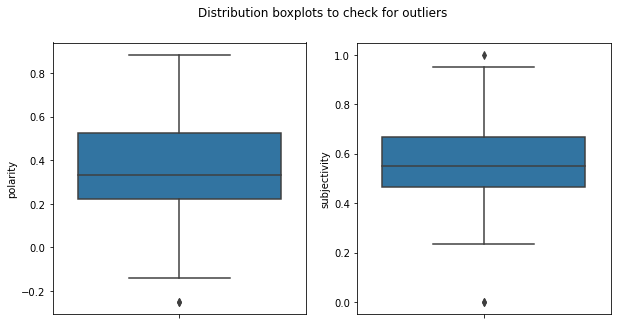

In [71]:
# check for any outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(y=polarity_check.polarity, ax=ax1)
sns.boxplot(y=polarity_check.subjectivity, ax=ax2)
fig.suptitle('Distribution boxplots to check for outliers')

plt.show()

In [76]:
# drop visible outlier with high negative polarity
outlier = polarity_check.polarity.idxmin()
data.drop(outlier, inplace=True)


In [77]:
# drop visible outlier with high negative polarity
outlier = polarity_check.subjectivity.idxmin()
data.drop(outlier, inplace=True)
outlier

58

In [78]:
data.shape

(121, 9)

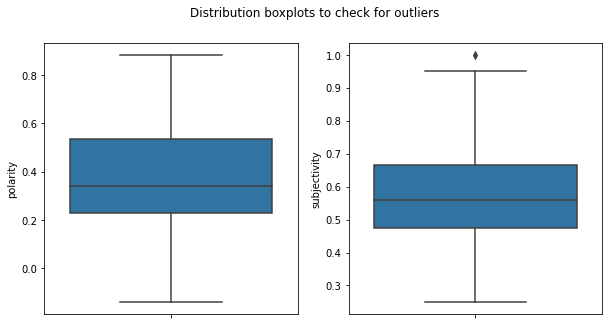

In [80]:
polarity_check = data[['message', 'polarity', 'star' ,'subjectivity']].sort_values(by='subjectivity', ascending=False)
polarity_check

# check for any outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(y=polarity_check.polarity, ax=ax1)
sns.boxplot(y=polarity_check.subjectivity, ax=ax2)
fig.suptitle('Distribution boxplots to check for outliers')

plt.show()

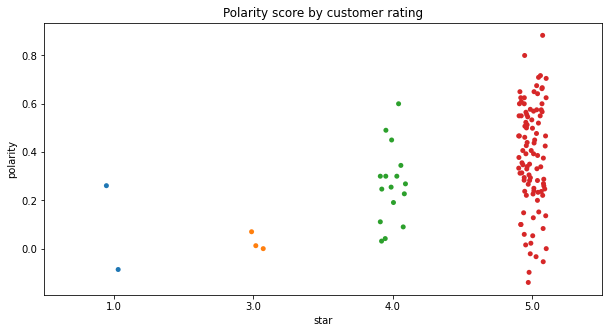

In [81]:
# scatter plot of polarity by rating
fig, ax = plt.subplots(figsize=(10, 5))

sns.stripplot(x='star', y='polarity', data=data, hue='star')
ax.legend_=None
ax.set_title('Polarity score by customer rating')

plt.show()

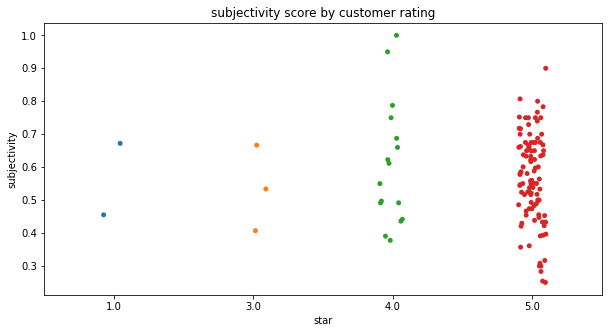

In [82]:
# scatter plot of subjectivity by rating
fig, ax = plt.subplots(figsize=(10, 5))

sns.stripplot(x='star', y='subjectivity', data=data, hue='star')
ax.legend_=None
ax.set_title('subjectivity score by customer rating')

plt.show()

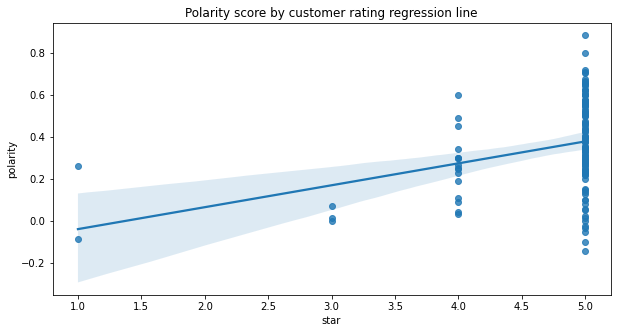

In [83]:
# regression plot of polarity by rating

fig, ax = plt.subplots(figsize=(10, 5))

sns.regplot(x='star', y='polarity', data=data, ci=95)
ax.set_title('Polarity score by customer rating regression line')

plt.show()


In [84]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


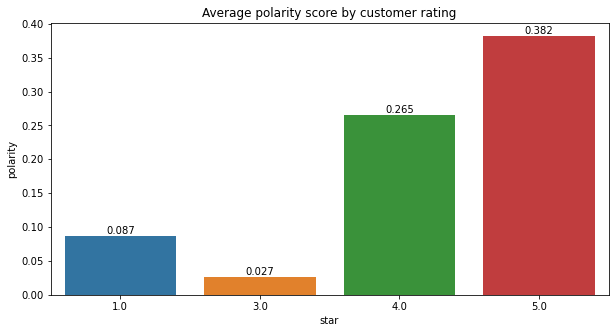

In [90]:
rating_gp = pd.DataFrame(data.groupby('star', as_index=False)['polarity'].mean().round(3).sort_values(by='star', ascending=True))
rating_gp

# bar plot polarity by rating
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x='star', y='polarity', data=rating_gp)
ax.bar_label(ax.containers[0])
ax.set_title('Average polarity score by customer rating')

plt.show()

In [86]:
# define a function to generate wordclouds from dataframes
def wordclouding(df, pic, palette):
  text = df['message-clean'].tolist()
  text = ' '.join(text)
  wordcloud = WordCloud(stopwords = STOPWORDS, 
                        collocations=True, 
                        width = 800, height = 800,
                        background_color='white', 
                        colormap=palette, 
                        mask=pic, 
                        ).generate(text)
  plt.figure(figsize = (10, 10)) 
  plt.imshow(wordcloud, 
             interpolation='bilInear'
             ) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()
    

In [87]:
# first extract worst and best 10% reviews by polarity score
worst = data[data['polarity']<0.0994]
best = data[data['polarity']>0.5600]

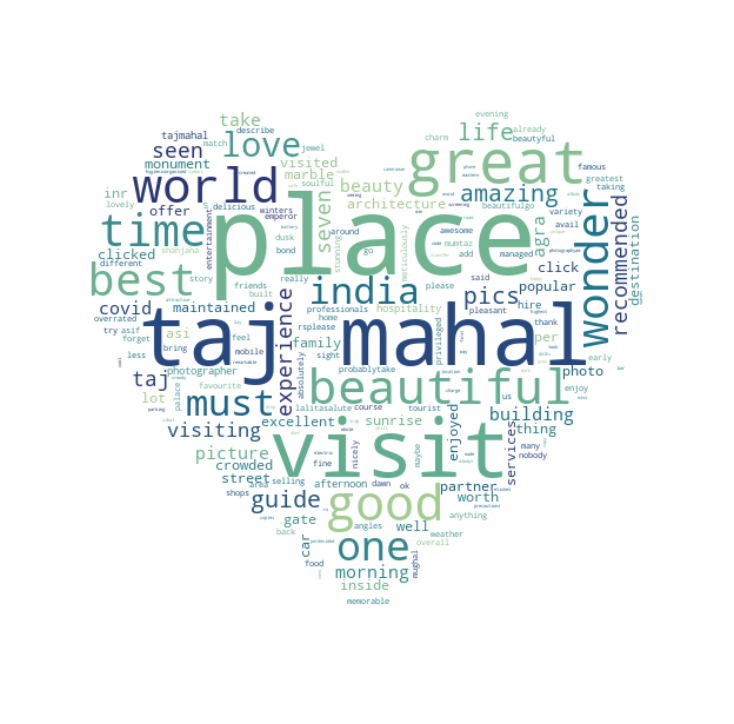

In [88]:
# compute 'best' wordcloud
import requests
url = 'https://media.istockphoto.com/vectors/heart-symbol-of-love-and-valentines-day-flat-red-icon-isolated-on-vector-id1128400054?b=1&k=20&m=1128400054&s=612x612&w=0&h=TeuKynPXDifmp5MUm1MsnM4wpmInK80tVBSlv3z3dtc='
heart = np.array(Image.open(requests.get(url, stream=True).raw))
wordclouding(best, heart, 'crest')

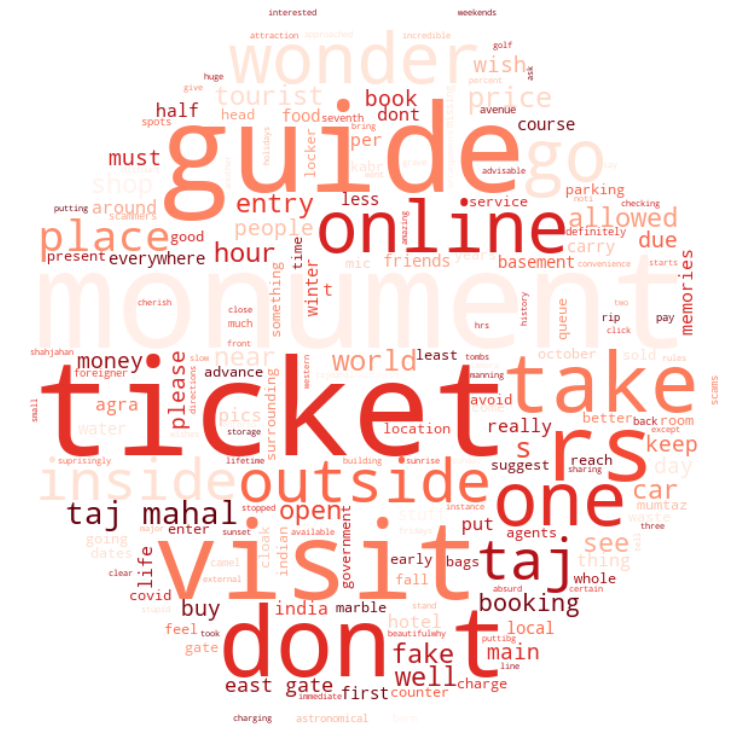

In [89]:
# compute 'worst' wordcloud
url = 'http://clipart-library.com/images/8iGbbB7aT.png'
stop = np.array(Image.open(requests.get(url, stream=True).raw))
wordclouding(worst, stop, 'Reds')

In [92]:
# extract bad and good reviews according to score
bad = data[data['star']<=3]
good = data[data['star']==5]


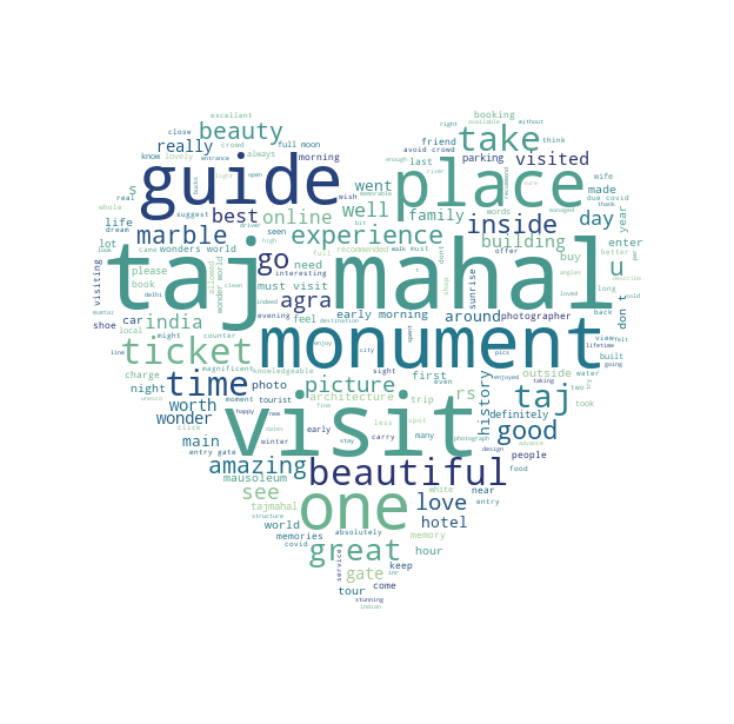

In [93]:
wordclouding(good, heart, 'crest')


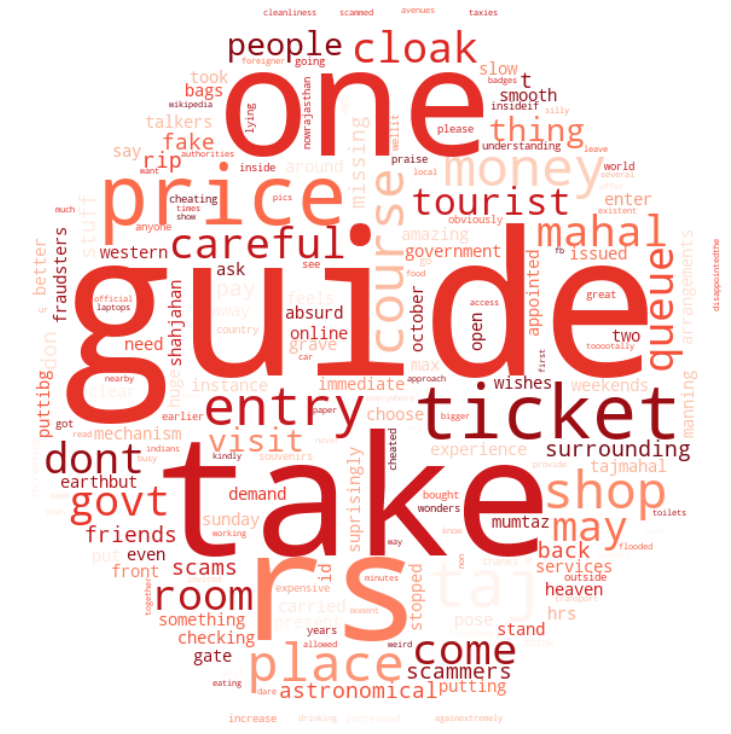

In [94]:
wordclouding(bad, stop, 'Reds')

In [59]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['polarity']))
fig.update_layout(title="Polarity Score Distribution")
fig.update_traces(opacity=0.70)


In [61]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['subj_score']))
fig.update_layout(title="Subjective Score Distribution")
fig.update_traces(opacity=0.70)


In [62]:
fig = px.box(data, y="poli_score", x='star')
fig.update_layout(title="Polarity Vs Number of Stars 🌟")

In [63]:
fig = px.box(data, y="subj_score", x='star')
fig.update_layout(title="Subjectivity Vs Number of Stars 🌟")

In [184]:
fig = px.box(data, y="subj_score", x='total-words')
fig.update_layout(title="Subjectivity Vs Number of Words")


In [189]:
df2= pd.DataFrame()
for i in range (1,6):
    df2.loc[i,'polarity']= (data.loc[data.star == i].poli_score.mean())
    df2.loc[i,'subjectivity']= (data.loc[data.star == i].subj_score.mean())
df2

polarity  subjectivity
1 -0.031410      0.380205
2       NaN           NaN
3 -0.041944      0.460176
4  0.235112      0.605617
5  0.374622      0.554925

In [191]:
fig=px.scatter(df2, x='polarity', y='subjectivity',text=df2.index,symbol=df2.index)
fig.update_traces(textposition="bottom right")
fig.update_layout(
title="Mean Polarity Vs Mean Subjectivity",
xaxis_title='⬅ Negative -- Positive ⮕',
yaxis_title='⬅ Facts -- Opinions ⮕',
legend_title="Legend Title"
     )
fig.update_layout(showlegend=False)

(-0.5, 399.5, 199.5, -0.5)

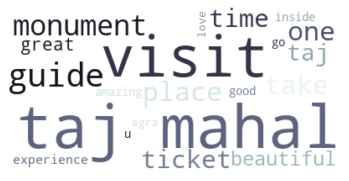

In [194]:
df_good_reviews = data
corpus_good_reviews =[]
freq=[]
freq = df_good_reviews['message-clean'].str.split()
freq = freq.values.tolist()
freq = [word for i in freq for word in i]
freq_words =''
freq_words+=" ".join(freq)+" "

wordcloud_freq = WordCloud(background_color = "white", max_words = 20,colormap='bone').generate(freq_words)
plt.imshow(wordcloud_freq, interpolation = 'bilinear')
plt.axis("off")